# Smartphone sales Analysis start with simple model
___

### __author__ = "Mujib Sukri Luman"
 ### __Email__ = ["mujibsukriluman@gmail.com"](mujibsukriluman@gmail.com)
### __website__ = ["nurastars@figcube.com"](https://nurastars.figcube.com/)

---

# Problem
___
- Technology and communication currently play an important role in life. The effects are clearly visible is the use of Smartphones that encourages competition between different Smartphone Brands. [refers to public information](https://databoks.katadata.co.id/datapublish/2023/06/06/idc-pasar-smartphone-indonesia-merosot-119-kuartal-i-2023-siapa-pemimpin-pasar), in 2021, smartphone shipments from abroad in the first quartile as much as 7.9 million. A smartphone mini market wants to open new branch in throughout Indonesia, he wants to give tough fight to big shops. He does not know how to estimate price of smartphones his shop. In other cases, that it cannot be predicted for smartphone sales in the future, where sales can be occurred unstable at one time, which result in stock product difficult to predict. In this competitive mobile phone, we cannot simply things. To solve this problem, we must collect several datasets of mobile phones of various famous and advanced shop in Indonesia. In this problem we do not have to predict actual price but a price range indicating how high the price is. And then what models of smartphones are a target of costumes.


- 
for this reason, in order to make easier it for stores to prepare stocks of sales product Brand Smartphone sales in the future. we mush forecasting with data mining prediction method using the Support Vector Machine because result of this method gooforecasting.


# Import Libraries
___

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from jcopml.plot import plot_missing_value

# Importing Data

In [2]:
dataset = pd.read_csv('Indonesian Phone Dataset.csv')
dataset.head()

,device,memory,internal_storage,os_price,dual_sim,esim,memory_slot,5g,nfc,body_length,body_width,body_thickness,weight,battery,display_type,display_size,display_res,refesh_rate,display_hdr
0,Apple iPhone 13,4,128,15200,1,1,0,1,1,146.7,71.5,7.7,174.0,3240,OLED,6.1,1170,60,1
1,Apple iPhone 13,4,512,19500,1,1,0,1,1,146.7,71.5,7.7,174.0,3240,OLED,6.1,1170,60,1
2,Apple iPhone 14,6,128,16000,1,1,0,1,1,146.7,71.5,7.8,172.0,3279,OLED,6.1,1170,60,1
3,Apple iPhone 14,6,256,19000,1,1,0,1,1,146.7,71.5,7.8,172.0,3279,OLED,6.1,1170,60,1
4,Apple iPhone 14,6,512,23000,1,1,0,1,1,146.7,71.5,7.8,172.0,3279,OLED,6.1,1170,60,1


# 1. Mini Explotratory Data Analysis
___

#### a. droping columns
this are columns haven`t correlation or does not have major affect on the target column

In [3]:
dataset.drop(columns=['body_length','body_width','body_thickness', 'display_type','display_size','display_res','refesh_rate'],  inplace=True)

#### b. spliting dataset
* -- doing spliting for the first step to avoid LEAKED DATA
* -- splitting to two feature, that are training and testing data

In [4]:
X = dataset.drop(columns='os_price')
y =dataset.os_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134, 11), (34, 11), (134,), (34,))

#### b. Preprocessing
* -- pipeline method is to easy for this processing. here we must make it with numerical_pipline and categorical_pipline.
* -- in the pipeline, we mush doing scaling data that involves normalizing the range of features in the dataset. we must remember this is processing just for training dataset.
* -- the countant in the pipeline is One-Hot-Encoder that is a technique used in machine learning to represent categorical vareables as numerical values.
* -- the ColumnTransformer is a class in the scikit-learn library that allows you to selectively apply different data preprocessing transformations to different columns of a dataset. devision of variables based on categories input to numerical and categorical_pipline.
___

In [5]:
numerical_pipline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipline = Pipeline([
    ('onehot', OneHotEncoder())
])

#preprocessor
preporcessor = ColumnTransformer([
    ('numeric', numerical_pipline, ['memory', 'internal_storage','battery']),
    ('categoric', categorical_pipline, ['dual_sim', 'esim', 'memory_slot'])
])

### c. making parameter
* -- in this case, traying with The k-nearest neighbors (KNN)
* -- tuning parameter in this model become the perpouse. Tuning in machine learning is the process of selecting and adjusting hyperparameters to optimize a model's performance without overfitting or creating too high of a variance
* -- GridSearchCV is a function in the scikit-learn library that performs hyperparameter tuning for machine learning models.
* -- Hyperparameters are the parameters that are set before the training process begins, as opposed to model parameters that are learned during training.
* -- GridSearchCV works by systematically trying out all possible combinations of hyperparameters specified in a parameter grid, and evaluating the model's performance using cross-validation.
* -- the last of this processing is the model. to get scoring info from the dataset.
___


In [7]:
pipline = Pipeline([
    ('prep', preporcessor),
    ('algoritm', KNeighborsClassifier())
])

#parameter tuning
parameter = {
    'algoritm__n_neighbors': np.arange(1,52, 3), #  parameter : pipline.get_params()
    'algoritm__weights': ['uniform', 'distance'],
    'algoritm__p' : [1,2]
}




In [9]:
model = GridSearchCV(pipline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 68 candidates, totalling 204 fits


C:\Users\User\anaconda3\envs\myproject\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['memory',
                                                                          'internal_storage',
                                                                          'battery']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['dual_sim',
                                                                          'esim',
                                                                          'memory_slot'])])),
                                       ('algoritm', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algoritm__n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]),
                         'algoritm__p': [1, 2],
                         'algoritm__weights': ['uniform', 'distance']},
             verbose=1)

In [8]:
#evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_,model.score(X_test, y_test))

Fitting 3 folds for each of 68 candidates, totalling 204 fits


C:\Users\User\anaconda3\envs\myproject\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'algoritm__n_neighbors': 13, 'algoritm__p': 1, 'algoritm__weights': 'uniform'}
0.17164179104477612 0.06717171717171717 0.08823529411764706


# another method to chacking basline in the modeling dataset

max test score: 0.11764705882352941
n_neibor terbaik:23


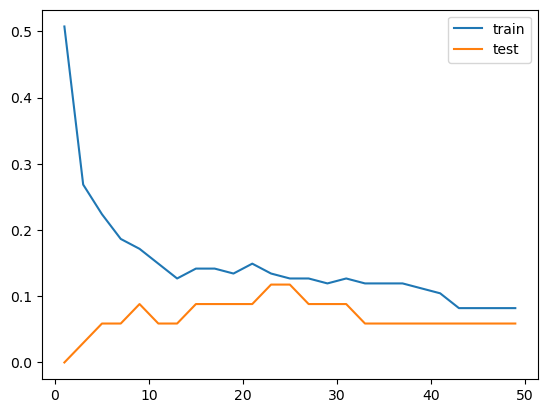

In [30]:
neighbor = range(1, 51, 2)
# agar hasilnya terekap semua maka
train_score =[]
test_score = []


for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend(); 

print(f'max test score: {np.max(test_score)}')
# agar diproses dahulu/dihitung dahulu kemudian ditulis maka tambahkan f = formating
print(f'n_neibor terbaik:{neighbor[np.argmax(test_score)]}')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.08208955223880597, 0.058823529411764705)